In [ ]:
!apt-get install unrar -y
!pip install rarfile



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# Install required tools
!apt-get install unrar -y
!pip install rarfile

# Now extract the dataset
import rarfile
import os

rar_path = "/content/RiceDataset.rar"
extract_path = "/content/rice_dataset_full"

# Make sure rarfile uses unrar
rarfile.UNRAR_TOOL = "/usr/bin/unrar"

# Extract the RAR file
with rarfile.RarFile(rar_path) as rf:
    rf.extractall(path=extract_path)

print(" RAR file extracted successfully!")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [29]:
import os
import shutil

#  Source: where the rice variant folders are
augmented_path = "/content/rice_dataset_full/Augmented"

#  Destination: new folder for the 10-image samples
sample_path = "/content/rice_dataset_sample"
os.makedirs(sample_path, exist_ok=True)

#  Loop through each rice variety folder inside "augmented"
class_folders = sorted([f for f in os.listdir(augmented_path) if os.path.isdir(os.path.join(augmented_path, f))])

for folder in class_folders:
    src = os.path.join(augmented_path, folder)
    dst = os.path.join(sample_path, folder)
    os.makedirs(dst, exist_ok=True)

    images = sorted([f for f in os.listdir(src) if f.lower().endswith('.jpg')])

    if len(images) < 10:
        print(f"Folder '{folder}' has only {len(images)} images — copying all available.")

    for img in images[:10]:
        shutil.copy(os.path.join(src, img), os.path.join(dst, img))

print(" Sampled up to 10 images from each rice variant.")


 Sampled up to 10 images from each rice variant.


In [28]:
# Get all class (folder) names
class_names = sorted(os.listdir(sample_path))

print(" Total Rice Varieties Found:", len(class_names))
print(" Rice Variant Names:\n")

# Display nicely in columns
for i, name in enumerate(class_names, 1):
    print(f"{i:>2}. {name}")


 Total Rice Varieties Found: 5
 Rice Variant Names:

 1. Augmented
 2. BD30
 3. BD33
 4. BD39
 5. BD49


In [ ]:
for cls in sorted(os.listdir(sample_path)):
    img_count = len(os.listdir(os.path.join(sample_path, cls)))
    print(f"{cls}: {img_count} images")


Augmented: 0 images
BD30: 10 images
BD33: 10 images
BD39: 10 images
BD49: 10 images


✅ Total Rice Varieties Found: 5
📋 Rice Variant Names:

 1. Augmented
 2. BD30
 3. BD33
 4. BD39
 5. BD49


/tmp/ipython-input-18-3711666625.py:39: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


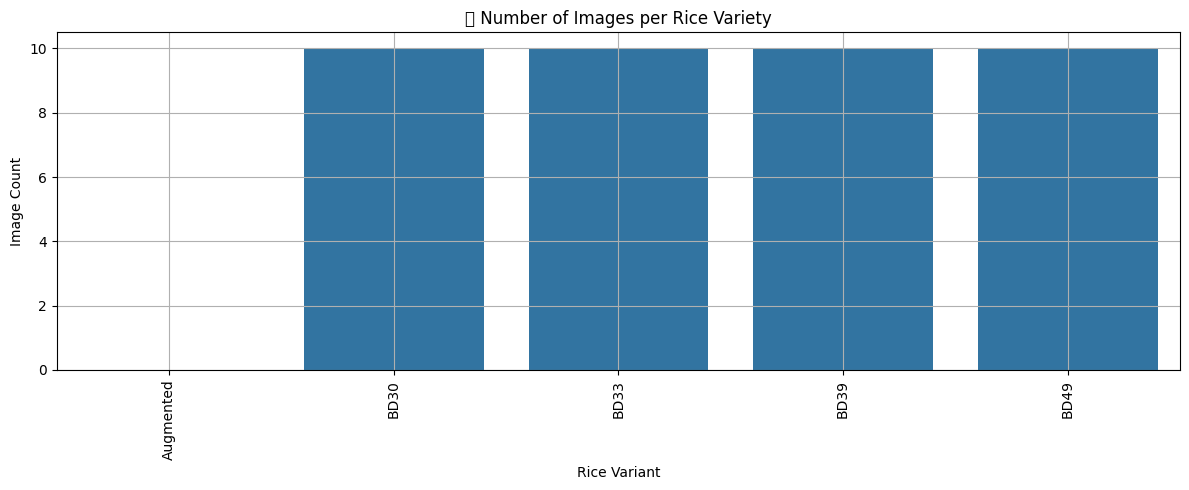

/tmp/ipython-input-18-3711666625.py:62: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


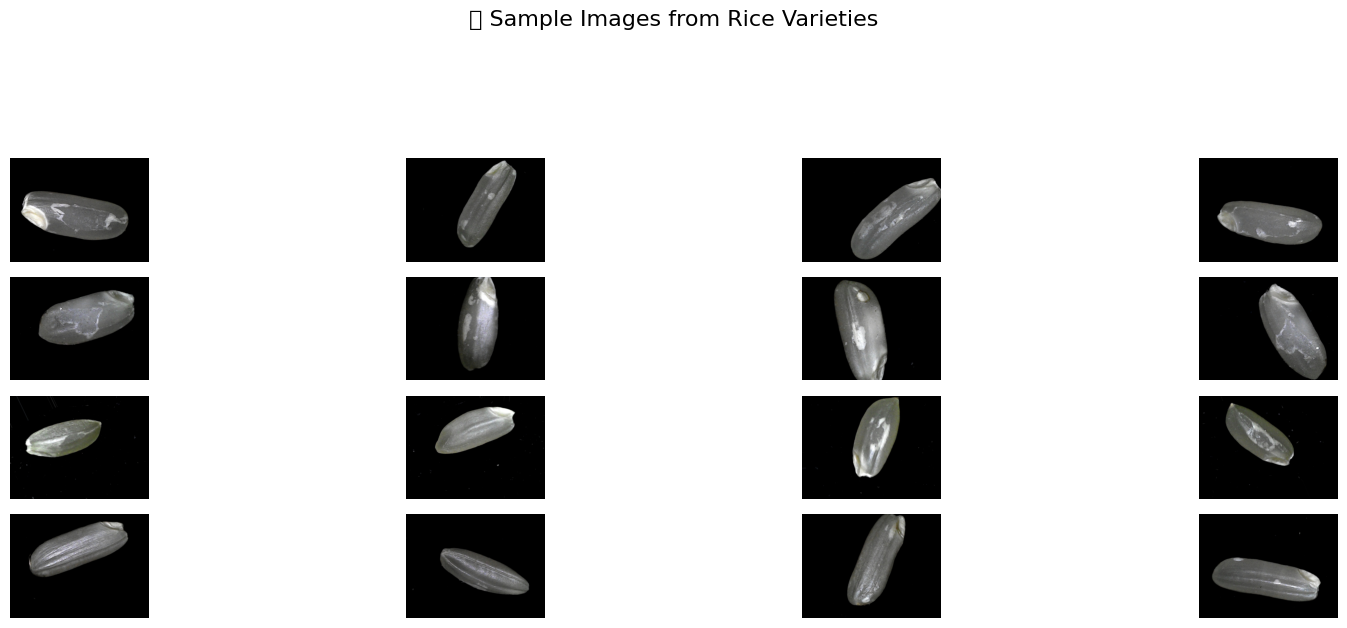

In [18]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

# Path to 'Augmented' folder containing rice variant folders
base_path = "/content/rice_dataset_sample"

# Get rice variant folders (exclude any non-folder files)
class_names = sorted([f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))])

print("Total Rice Varieties Found:", len(class_names))
print("Rice Variant Names:\n")
for i, name in enumerate(class_names, 1):
    print(f"{i:>2}. {name}")

# Count images and gather image sizes
class_counts = {}
image_shapes = []

for cls in class_names:
    folder_path = os.path.join(base_path, cls)
    images = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]
    class_counts[cls] = len(images)
    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        with Image.open(img_path) as img:
            image_shapes.append(img.size)  # (width, height)

# Plot number of images per class
plt.figure(figsize=(12, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=90)
plt.title(" Number of Images per Rice Variety")
plt.xlabel("Rice Variant")
plt.ylabel("Image Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Image size distribution
widths, heights = zip(*image_shapes)
unique_shapes, counts = np.unique(image_shapes, return_counts=True)



# Display sample images (4 images per class from first 8 classes)
def show_sample_images(base_dir, classes, samples=4):
    plt.figure(figsize=(16, len(classes)*2))
    for idx, cls in enumerate(classes[:8]):
        cls_path = os.path.join(base_dir, cls)
        imgs = sorted([f for f in os.listdir(cls_path) if f.endswith('.jpg')])[:samples]
        for j, img_name in enumerate(imgs):
            img = Image.open(os.path.join(cls_path, img_name))
            plt.subplot(8, samples, idx*samples + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.ylabel(cls, rotation=0, labelpad=50, fontsize=10)
    plt.suptitle(" Sample Images from Rice Varieties", fontsize=16)
    plt.tight_layout()
    plt.show()

show_sample_images(base_path, class_names)


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)  # Resize images for CNN input
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    base_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_gen = datagen.flow_from_directory(
    base_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)


Found 32 images belonging to 5 classes.
Found 8 images belonging to 5 classes.


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output layer for number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5  # Adjust epochs as you want
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1562 - loss: 1.6199

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1562 - loss: 1.6199 - val_accuracy: 0.2500 - val_loss: 1.4953
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 1.0646 - val_accuracy: 0.3750 - val_loss: 1.7145
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7188 - loss: 0.7881 - val_accuracy: 0.3750 - val_loss: 1.7680
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8438 - loss: 0.4240 - val_accuracy: 0.2500 - val_loss: 2.0504
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step - accuracy: 0.9375 - loss: 0.2144 - val_accuracy: 0.2500 - val_loss: 2.1768


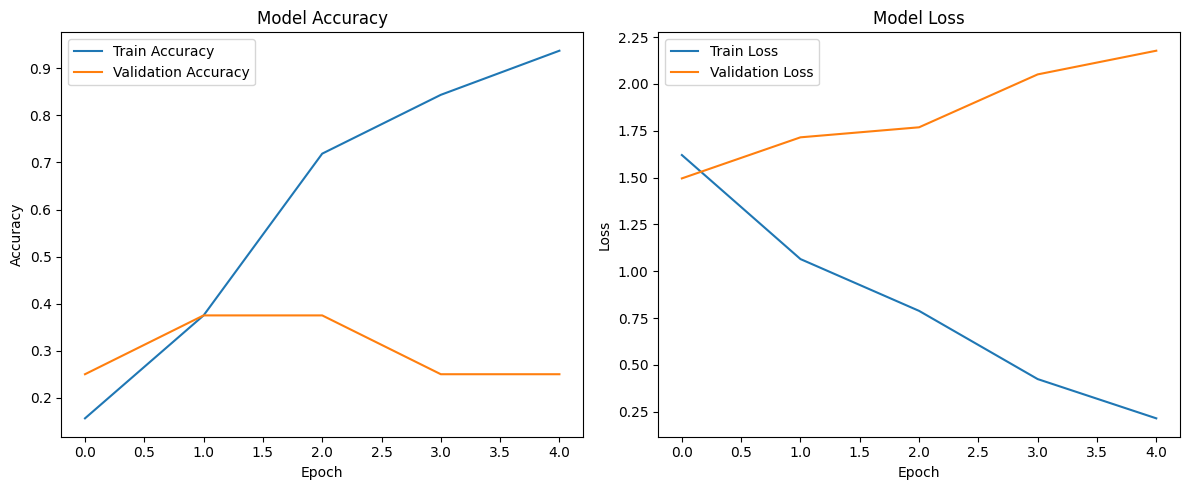

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Reset the validation generator to start from the beginning
val_gen.reset()

# Predict classes for all validation data
pred_probs = model.predict(val_gen, verbose=1)

# Predicted class indices
y_pred = np.argmax(pred_probs, axis=1)

# True class indices
y_true = val_gen.classes

# Class labels (same order as in the generator)
class_labels = list(val_gen.class_indices.keys())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


In [26]:
import numpy as np

# Get unique classes in true and predicted labels
unique_labels = np.unique(np.concatenate([y_true, y_pred]))
print("Unique labels in validation:", unique_labels)

# Use these as the labels argument in classification_report
print(classification_report(
    y_true, y_pred,
    labels=unique_labels,
    target_names=[class_labels[i] for i in unique_labels]
))


Unique labels in validation: [1 2 3 4]
              precision    recall  f1-score   support

        BD30       0.00      0.00      0.00         2
        BD33       0.20      0.50      0.29         2
        BD39       0.50      0.50      0.50         2
        BD49       0.00      0.00      0.00         2

    accuracy                           0.25         8
   macro avg       0.17      0.25      0.20         8
weighted avg       0.17      0.25      0.20         8



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
